In [1]:
import os
import pickle
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
stateCodes=pickle.load(open("stateCode.pickle","rb"))
paths=[str(i)+'/' for i in stateCodes]

yearMap=OrderedDict()
yearMapRev=OrderedDict()
count=0
for year in range(1980,2018):
    yearMap[str(year)]=count
    yearMapRev[count]=str(year)
    count+=1
    
carbA=[6,41,53]
carbB=[9,10,23,24,25,34,36,42,44,50,11]

noState = ['"Guam"','"Puerto Rico"','"Hawaii"']
nonCarb = [i for i in stateCodes if i not in carbA+carbB and stateCodes[i] not in noState]

In [3]:

data=OrderedDict()
for path in paths:
    key=path[:-1]
    f=open('{}/CorrelationsSummary/networkfeautures.csv'.format(key),'r')

    for l in f:
        row=l.strip().split(',')
        year=row[0].split('/')[-1]
        CC = float(row[-1]) if row[-1] !='float division by zero' else None
        if key not in data:
            data[key]=OrderedDict()
        data[key][year]=CC

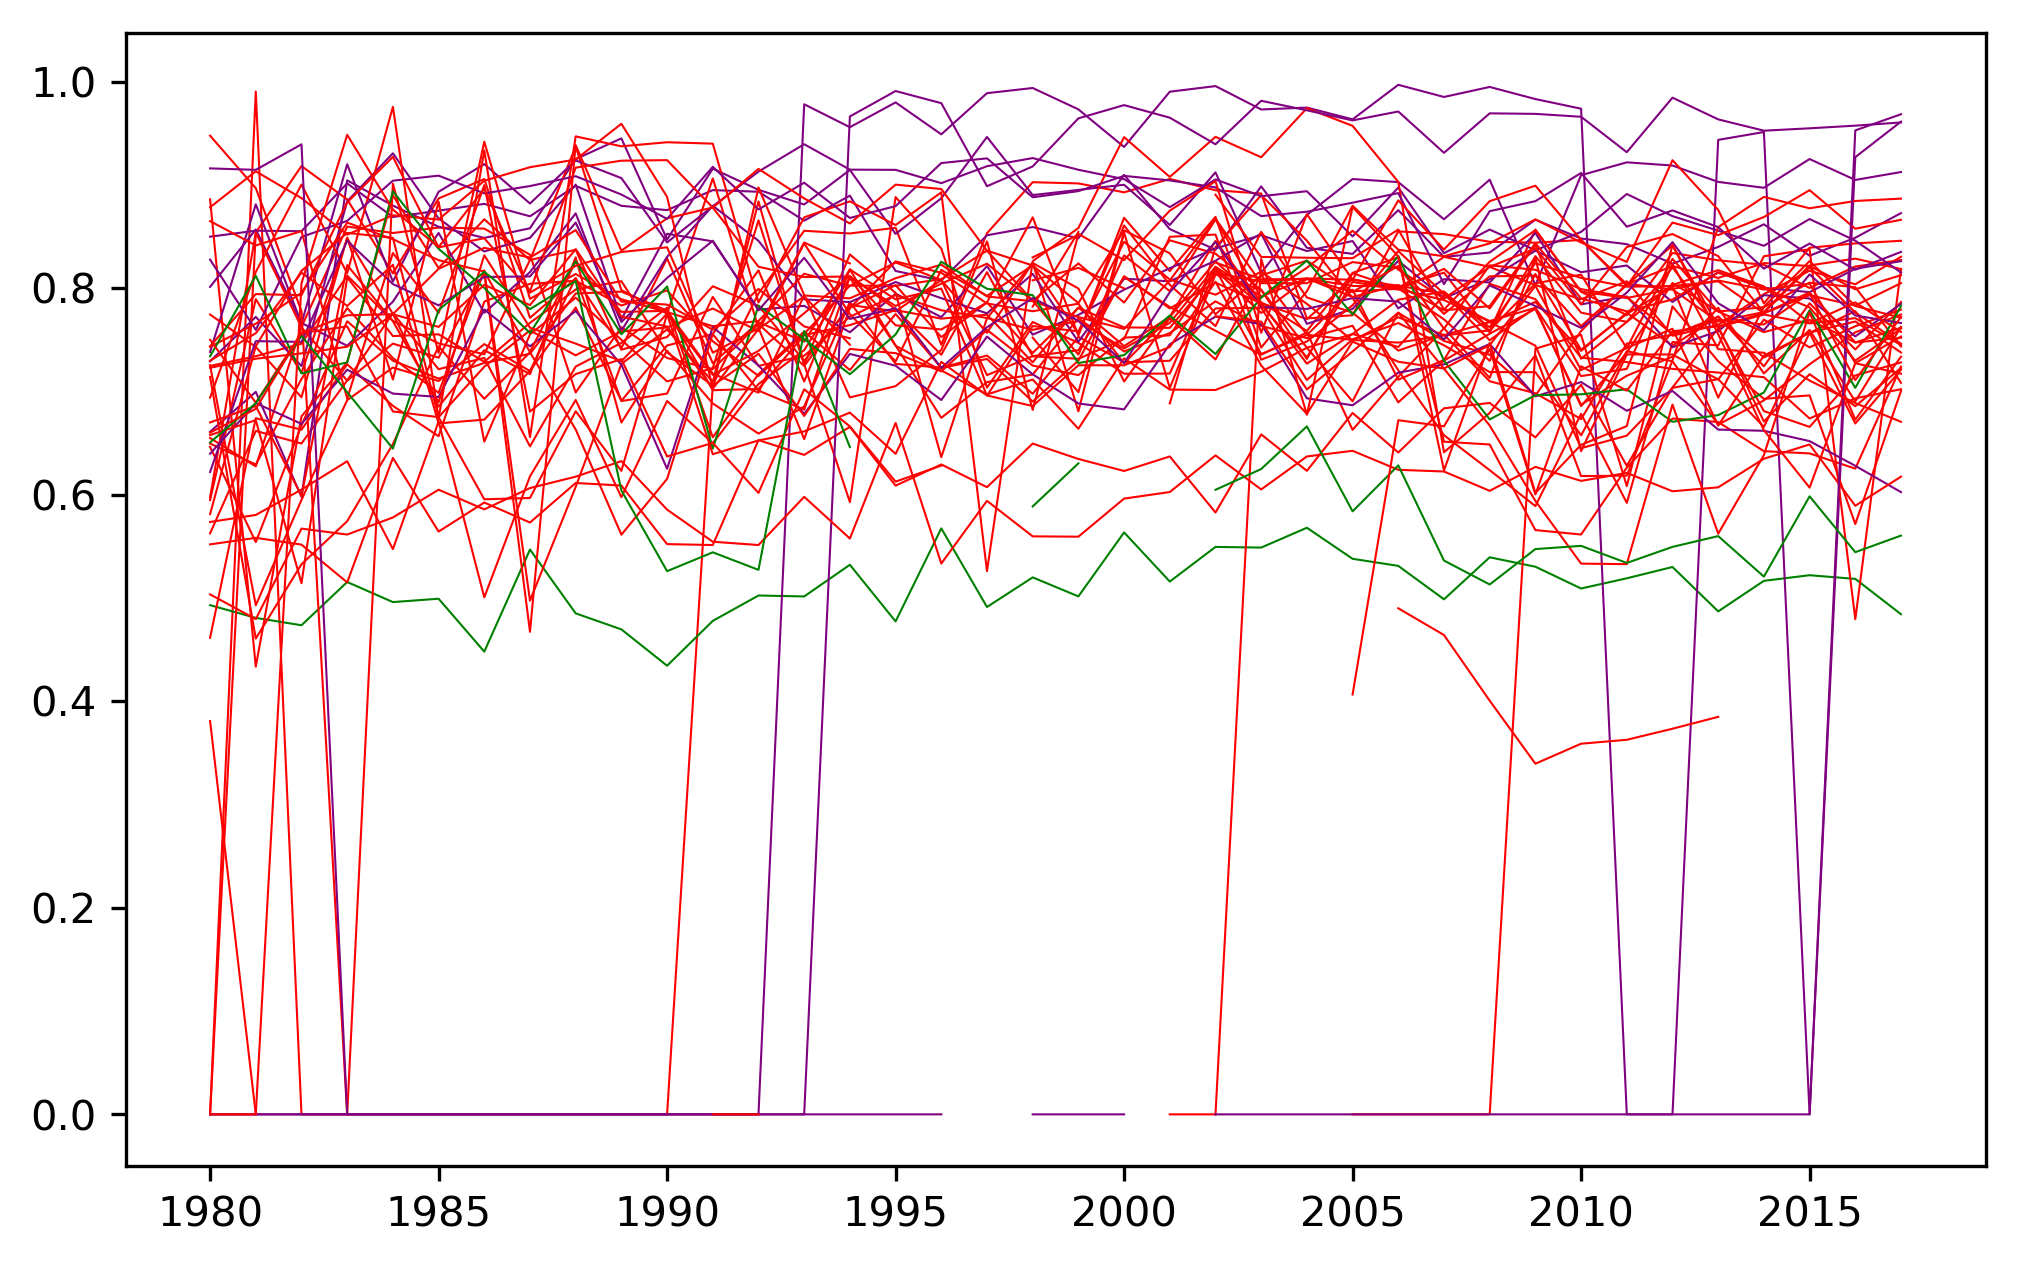

In [4]:
plt.close()
width=0.5
plt.subplots(figsize=(8,5),dpi=300)
for codes in data:
    intCode = int(codes)
    if intCode in carbA:
        plt.plot(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='g',linewidth=width)
    elif intCode in carbB:
        plt.plot(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='purple',linewidth=width)
    else:
        plt.plot(list(range(len(data[codes]))),[data[codes][i] for i in data[codes]],label=stateCodes[int(codes)],color='r',linewidth=width)

plt.xticks(list(range(len(data[codes])))[::5],[i for i in data[codes]][::5])
#plt.legend(loc='center',bbox_to_anchor=(0.5, 1.05),ncol=10,frameon=False)
plt.show()

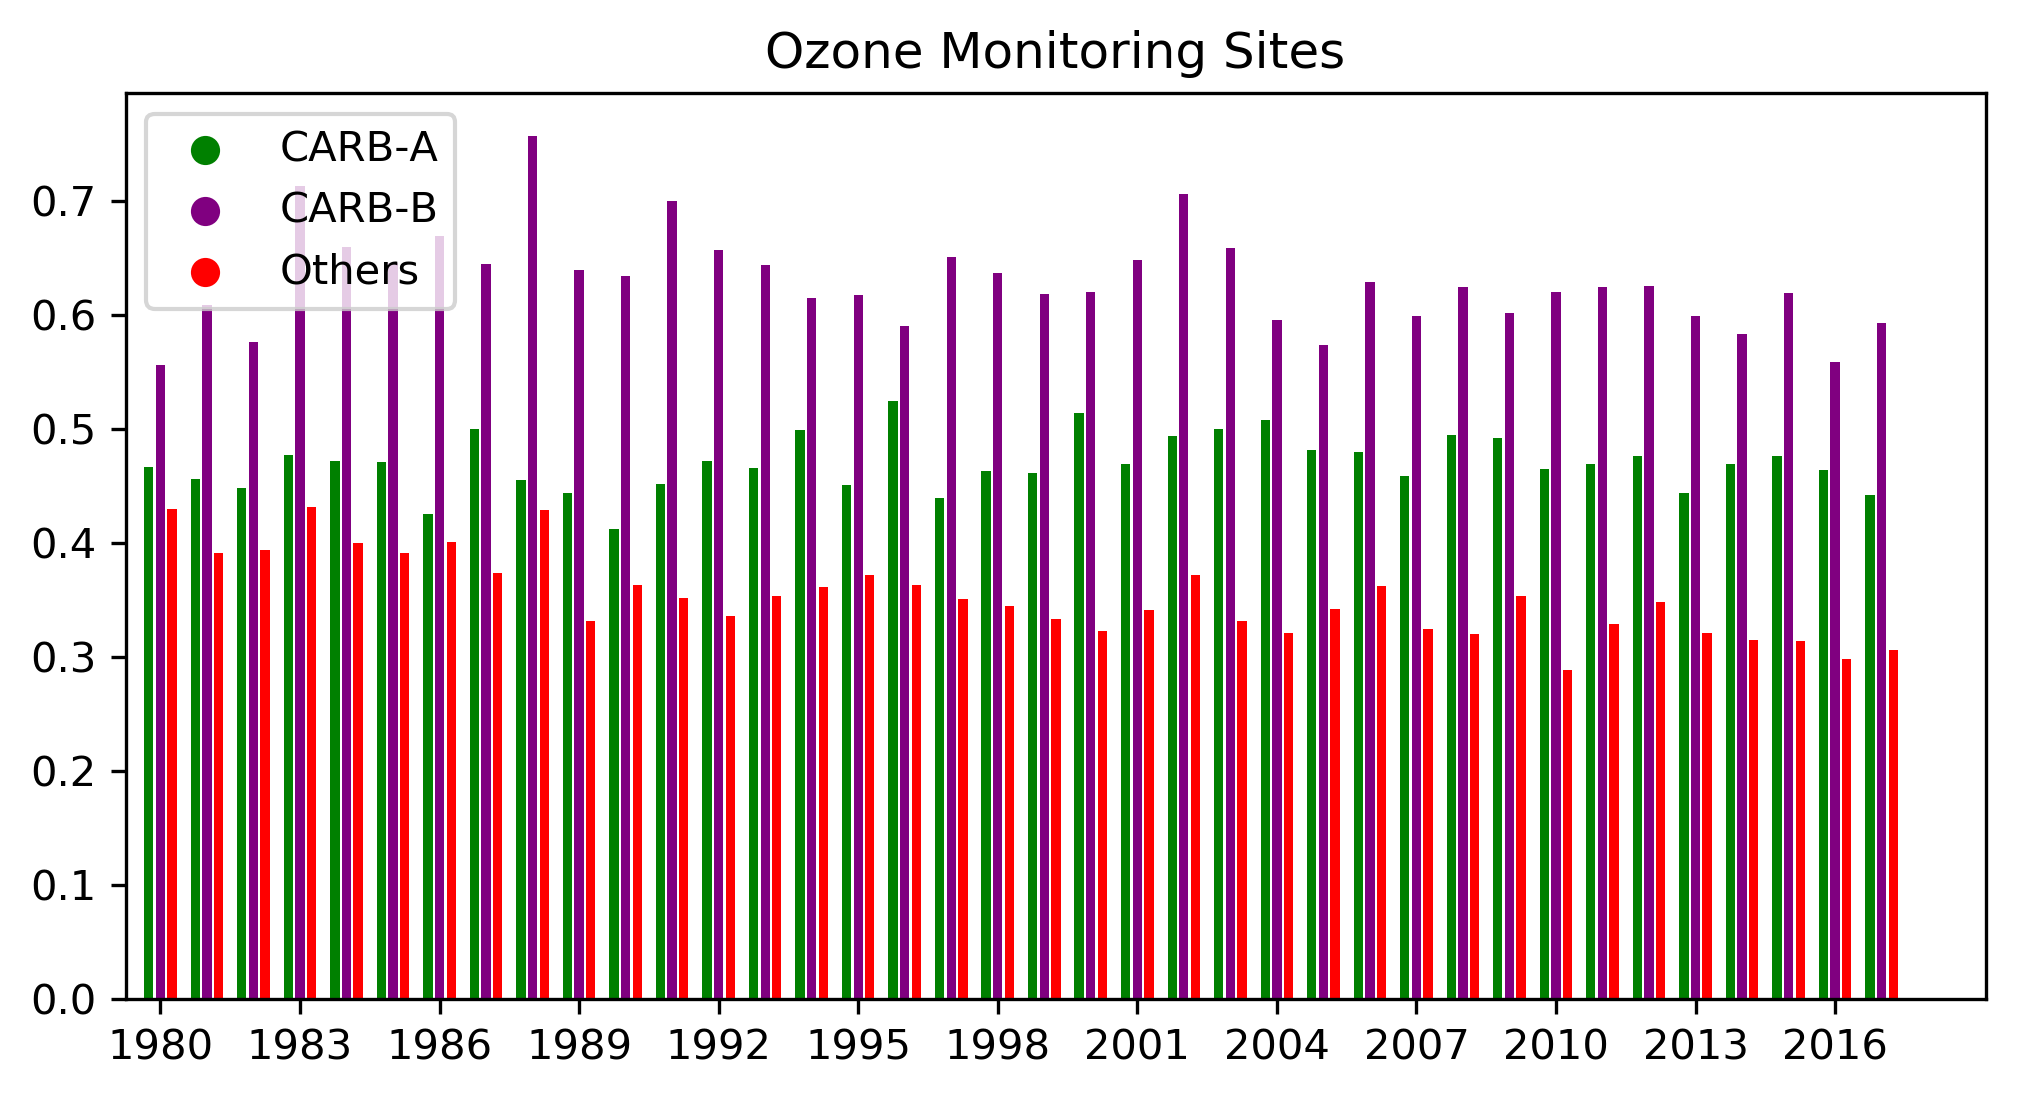

In [5]:


regionData=OrderedDict()
for codes in ['CARBA','CARBB','Others']:
    f=open('{}/CorrelationSummary/networkfeautures.csv'.format(codes),'r')
    for l in f:
        row=l.strip().split(',')
        year=row[0].split('/')[-1]
        CC = float(row[-1]) if row[-1] !='float division by zero' else None
        if year not in regionData:
            regionData[year]={}
        regionData[year][codes]=CC
       
      
plt.close()
plt.subplots(figsize=(8,4),dpi=300)  
for year,index in zip(regionData,range(0,4*len(regionData),4)):
    #print(year,index,regionData[year]['A'])
    plt.bar(index-1,regionData[year]['CARBA'],color='g')
    plt.bar(index,regionData[year]['CARBB'],color='purple')
    plt.bar(index+1,regionData[year]['Others'],color='r')

plt.xlim(-3,None)
plt.ylim(0,None)
plt.scatter(-5,-5,color='g',label='CARB-A')
plt.scatter(-5,-5,color='purple',label='CARB-B')
plt.scatter(-5,-5,color='r',label='Others')
plt.legend(loc='upper left')
plt.xticks(list(range(0,4*len(regionData),4))[::3],[i for i in regionData][::3])
plt.title("Ozone Monitoring Sites")
plt.show()

In [6]:
ndata=[]
for codes in data:
    ndata.append([data[codes][i] if data[codes][i]!=None else np.nan for i in data[codes]])

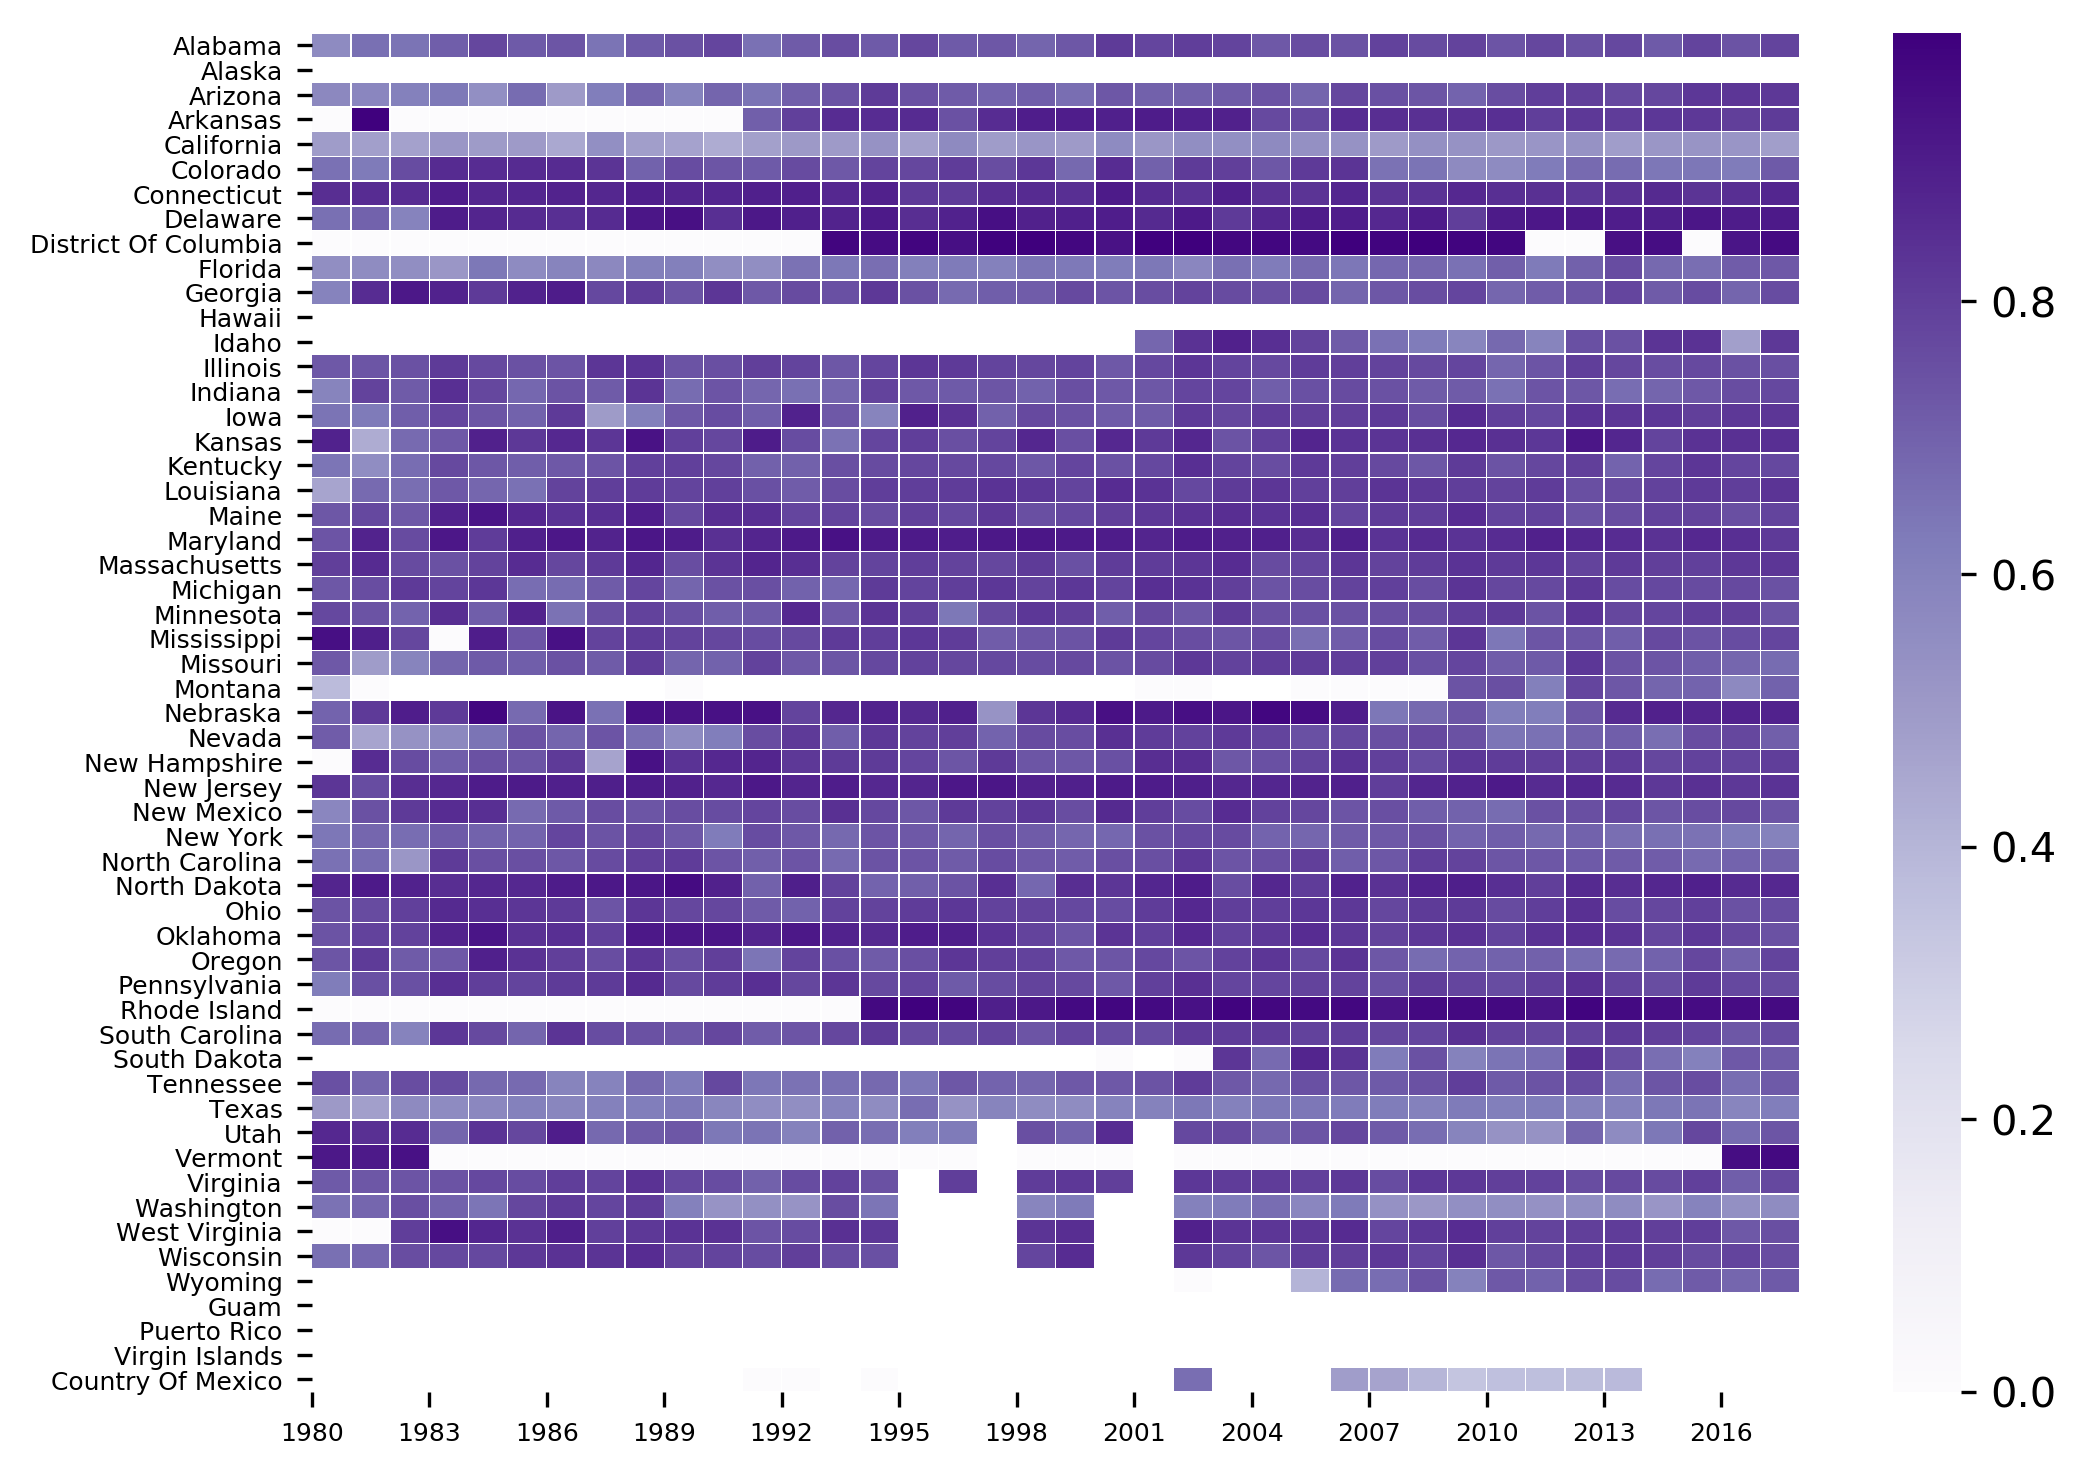

In [7]:
plt.close()
plt.subplots(figsize=(8,6),dpi=300) 

sns.heatmap(ndata,linewidth=0.1,cmap=plt.get_cmap('Purples'))
plt.yticks([i+0.5 for i in range(len(data))],[stateCodes[int(i)].replace('"','') for i in data],size=6)
plt.xticks(list(range(len(yearMap)))[::3],list(yearMap)[::3],size=6)
plt.show()

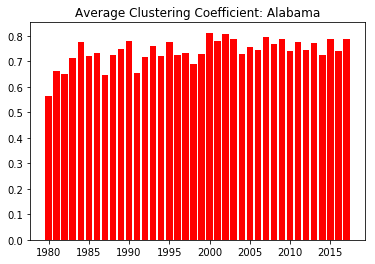

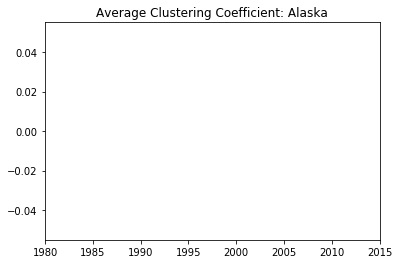

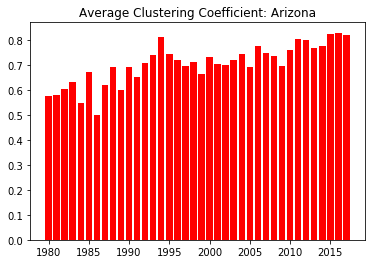

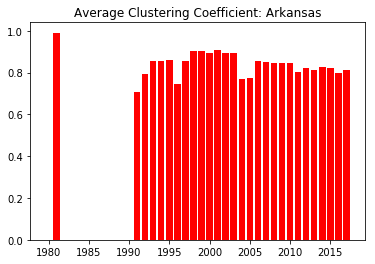

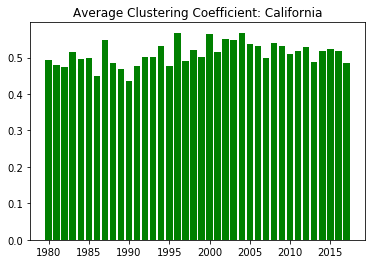

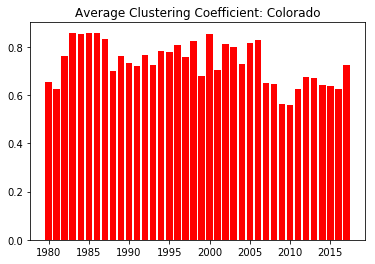

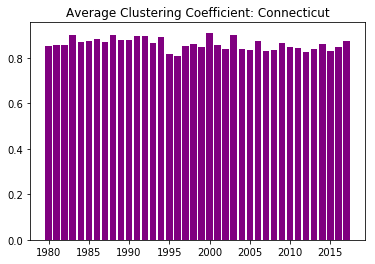

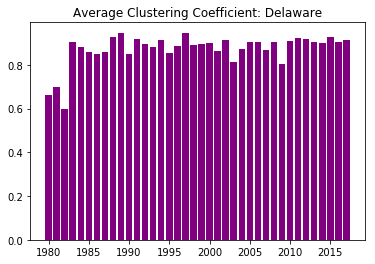

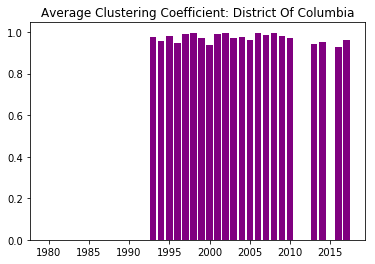

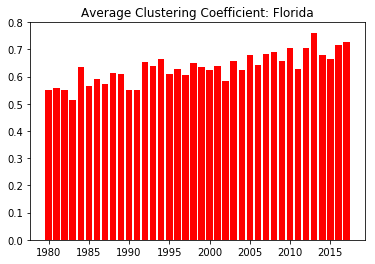

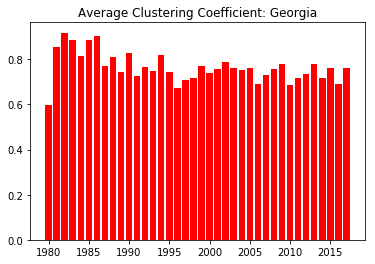

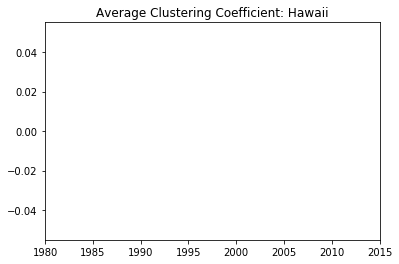

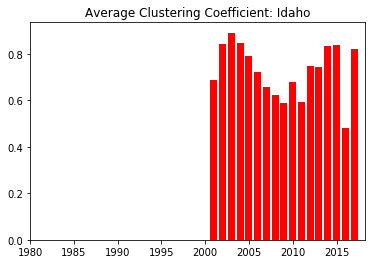

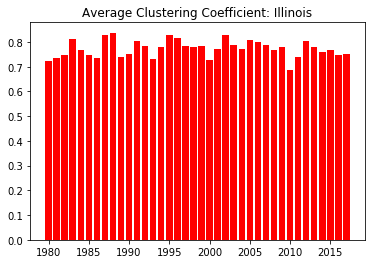

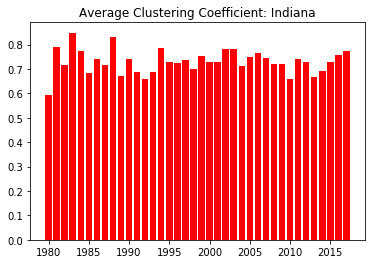

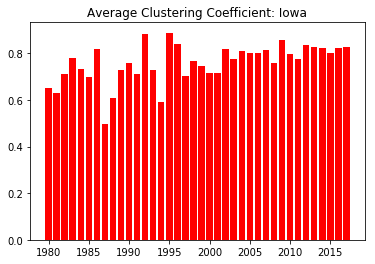

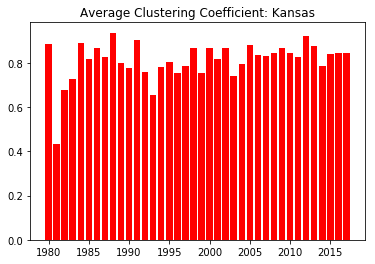

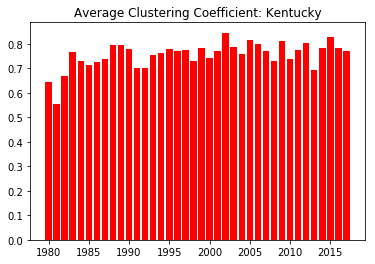

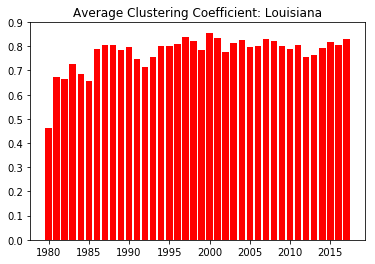

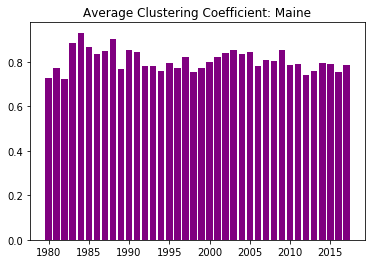

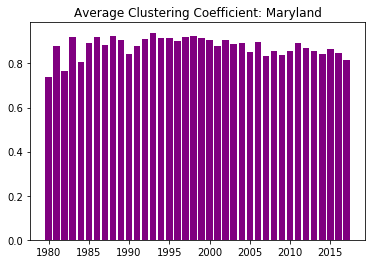

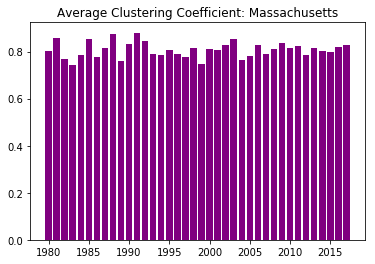

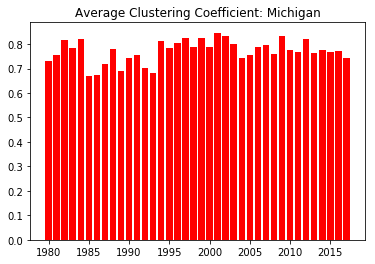

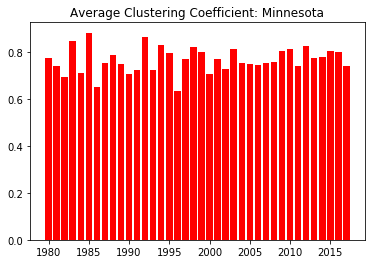

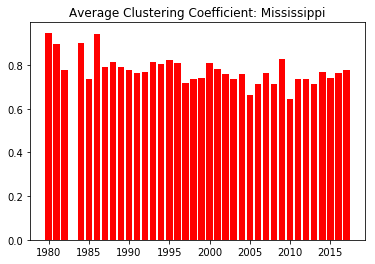

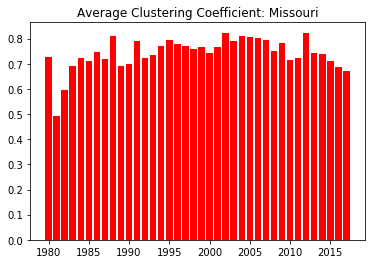

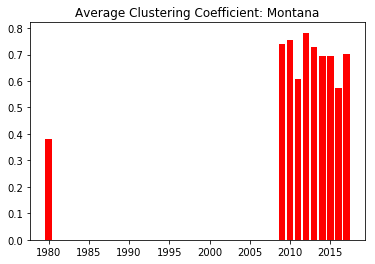

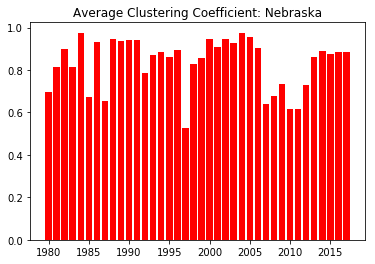

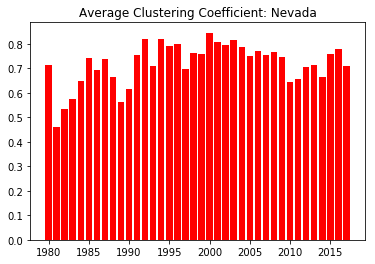

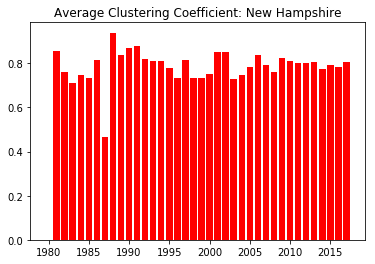

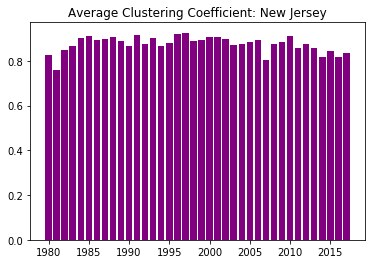

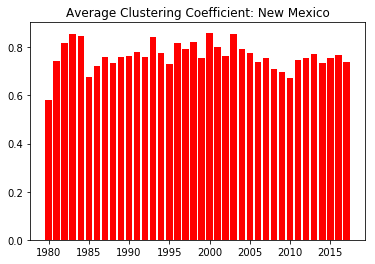

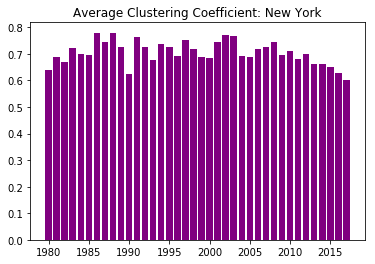

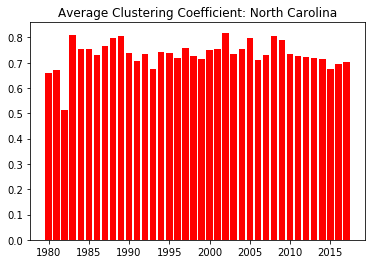

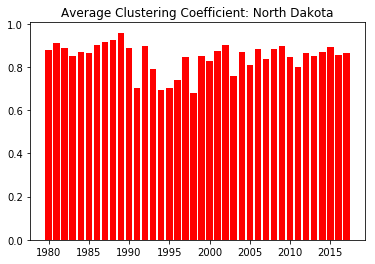

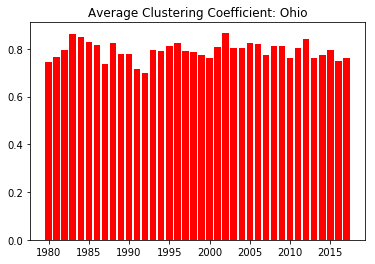

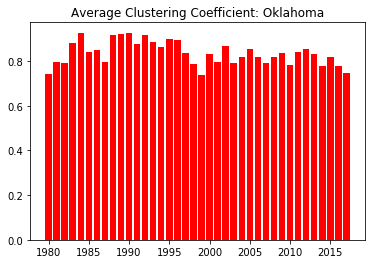

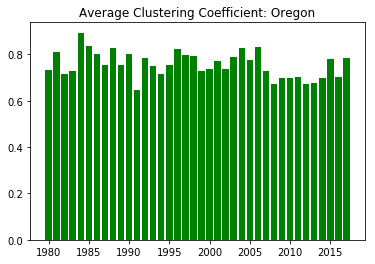

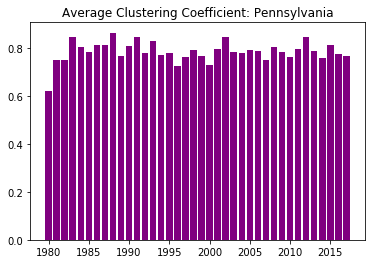

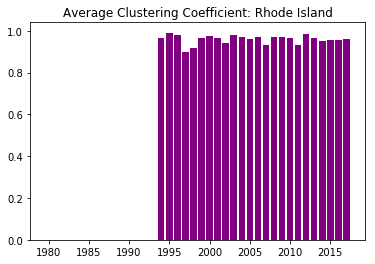

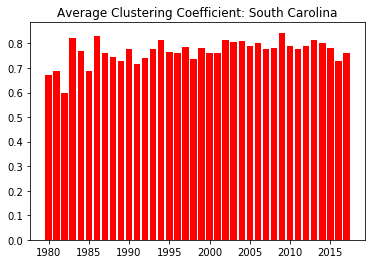

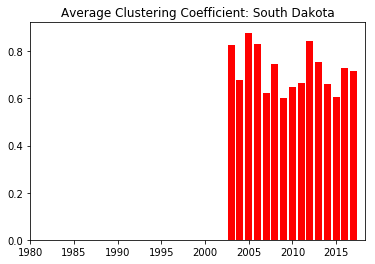

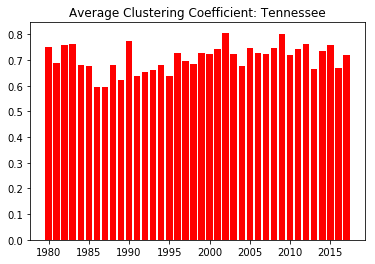

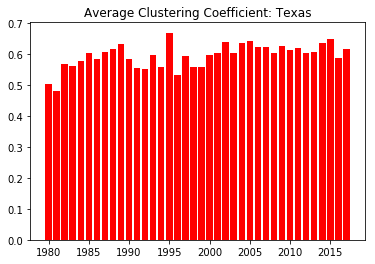

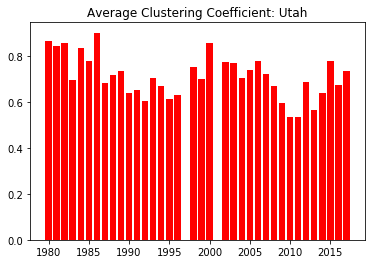

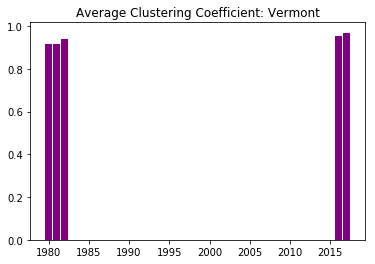

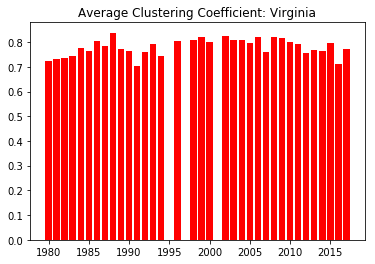

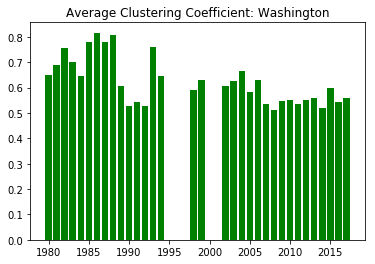

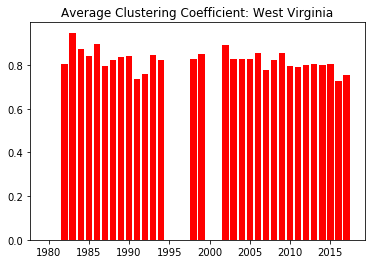

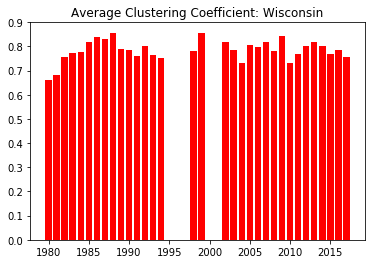

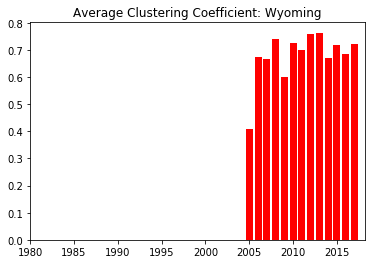

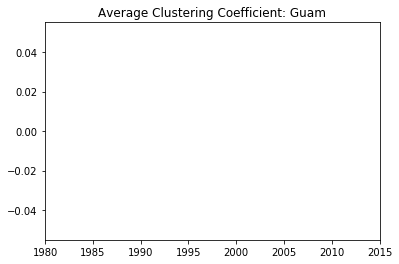

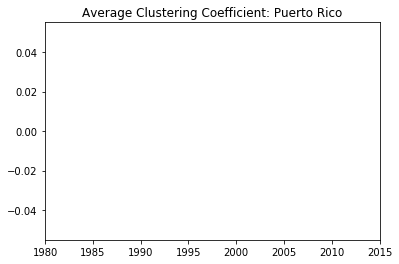

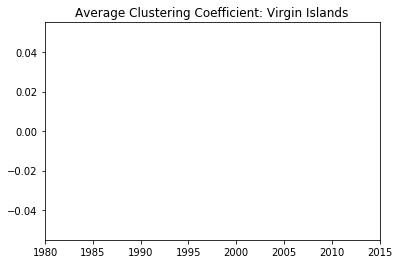

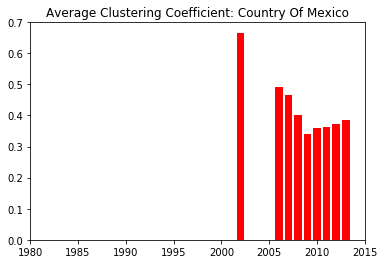

In [6]:
for codes in data:
    plt.close()
    #plt.subplots(figsize=(2,1),dpi=300)
    intCode = int(codes)
    if intCode in carbA:
        plt.bar(list(range(len(data[codes]))),[data[codes][i] if data[codes][i]!=None else np.nan for i in data[codes]],label=stateCodes[int(codes)],color='g')
    elif intCode in carbB:
        plt.bar(list(range(len(data[codes]))),[data[codes][i] if data[codes][i]!=None else np.nan for i in data[codes]],label=stateCodes[int(codes)],color='purple')
    else:
        plt.bar(list(range(len(data[codes]))),[data[codes][i] if data[codes][i]!=None else np.nan for i in data[codes]],label=stateCodes[int(codes)],color='r')

    plt.xticks(list(range(len(data[codes])))[::5],[i for i in data[codes]][::5])
    plt.title("Average Clustering Coefficient: {}".format(stateCodes[int(codes)].replace('"','')))
    plt.show()

In [10]:
pickle.dump(regionData,open("clusteringCoefRegion.pickle",'wb'))

OrderedDict([('1980',
              {'CARBA': 0.46666736551825483,
               'CARBB': 0.555420572057292,
               'Others': 0.4282329831293445}),
             ('1981',
              {'CARBA': 0.45633244668201106,
               'CARBB': 0.6112658942562741,
               'Others': 0.3908130075837269}),
             ('1982',
              {'CARBA': 0.4482483932462954,
               'CARBB': 0.577805828126248,
               'Others': 0.3899703097883777}),
             ('1983',
              {'CARBA': 0.4773368967333812,
               'CARBB': 0.7240780345109479,
               'Others': 0.42908844217812275}),
             ('1984',
              {'CARBA': 0.47154077740700373,
               'CARBB': 0.6675622007809058,
               'Others': 0.39708466110607477}),
             ('1985',
              {'CARBA': 0.471209286471988,
               'CARBB': 0.6556724837042978,
               'Others': 0.38853060942740403}),
             ('1986',
              {'CARBA': 0.4254141

In [9]:
regionData

OrderedDict([('1980',
              {'CARBA': 0.46666736551825483,
               'CARBB': 0.555974221682874,
               'Others': 0.4301926444926086}),
             ('1981',
              {'CARBA': 0.45633244668201106,
               'CARBB': 0.6091431175051668,
               'Others': 0.39148104555970226}),
             ('1982',
              {'CARBA': 0.4482483932462954,
               'CARBB': 0.5764901642815,
               'Others': 0.39353582347390315}),
             ('1983',
              {'CARBA': 0.4773368967333812,
               'CARBB': 0.7131586940578659,
               'Others': 0.43138937103280783}),
             ('1984',
              {'CARBA': 0.47154077740700373,
               'CARBB': 0.6598056720657707,
               'Others': 0.4001303157628471}),
             ('1985',
              {'CARBA': 0.471209286471988,
               'CARBB': 0.6452321865578922,
               'Others': 0.391339733396464}),
             ('1986',
              {'CARBA': 0.4254141883